In [1]:
# mount my Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# output the current working directory
%pwd

'/content'

In [3]:
# change directories
%cd ./gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/ml_project

/content/gdrive/Othercomputers/My iMac/Data_Science/ML_EndToEnd_Projects/ml_project


In [4]:
# install/import the dependencies
!pip install -U ydata_profiling -q

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.9/344.9 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 28.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.8 MB/s eta 0:00:00


In [5]:
# read 'student.csv' in as a Pandas DataFrame
df = pd.read_csv(r"./notebooks/data/student.csv")

In [6]:
# output five random samples from the 'df' DataFrame
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
753,female,group C,some high school,standard,completed,77,90,85
531,female,group C,some high school,standard,none,47,54,53
617,male,group D,bachelor's degree,standard,none,88,78,83
294,male,group D,high school,free/reduced,completed,78,77,80
619,male,group C,associate's degree,free/reduced,completed,65,73,68


In [7]:
# output the data type, memory usage, number of null values, and unique values for each column
df_info = (pd.DataFrame
           (
               {
                   "data_type": [str(dtype) for dtype in df.dtypes], 
                   "memory_usage": np.round(df.memory_usage(deep=True)[1:] / 1e6, 4), 
                   "n_nulls": df.isna().sum(), 
                   "n_unique": df.nunique()
               }
            )
           .sort_values(["data_type", "memory_usage"])
           )

df_info

,data_type,memory_usage,n_nulls,n_unique
math_score,int64,0.0080,0,81
reading_score,int64,0.0080,0,72
writing_score,int64,0.0080,0,77
gender,object,0.0620,0,2
test_preparation_course,object,0.0628,0,2
race_ethnicity,object,0.0640,0,5
lunch,object,0.0664,0,2
parental_level_of_education,object,0.0716,0,6


In [8]:
# create a ProfileReport for the 'df' DataFrame
profile = ProfileReport(df, explorative=True)

In [9]:
# output the ProfileReport's findings
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
# output the categories for each categorical feature
cat_cols = df.select_dtypes("object").columns.tolist()
cat_col_categories = {}
for col in cat_cols:
  cat_col_categories[col] = ", ".join(sorted(set(df[col])))

cat_col_categories

{'gender': 'female, male',
 'race_ethnicity': 'group A, group B, group C, group D, group E',
 'parental_level_of_education': "associate's degree, bachelor's degree, high school, master's degree, some college, some high school",
 'lunch': 'free/reduced, standard',
 'test_preparation_course': 'completed, none'}

In [11]:
# specify the nominal features (OneHotEncoder)
nominal_cols = ["gender", "race_ethnicity", "lunch", "test_preparation_course"]

# specify the ordinal features (OrdinalEncoder)
ordinal_cols = ["parental_level_of_education"]

# create an ordered list of categories for each ordinal feature
parental_level_of_education_order = [
    "some high school", 
    "high school", 
    "some college", 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

In [12]:
# specify the numeric features
num_cols = df.select_dtypes("number").columns.tolist()

# create a target variable that's the average score of...
# ...the 'math_score', 'reading_score', and 'writing_score' features
# remove the 'math_score', 'reading_score', and 'writing_score' features
df = (df
      .assign(avg_score=df[num_cols].mean(axis=1))
      .drop(num_cols, axis=1)
      .copy(deep=True)
)

# output the 1st five rows of the updated 'df' DataFrame
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,avg_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [13]:
# output the average of the 'avg_score' target, for each lunch category
(df
 .groupby("lunch")
 ["avg_score"]
 .mean()
 .to_frame()
 .sort_values("avg_score", ascending=False)
 .reset_index()
)

,lunch,avg_score
0,standard,70.837209
1,free/reduced,62.199061


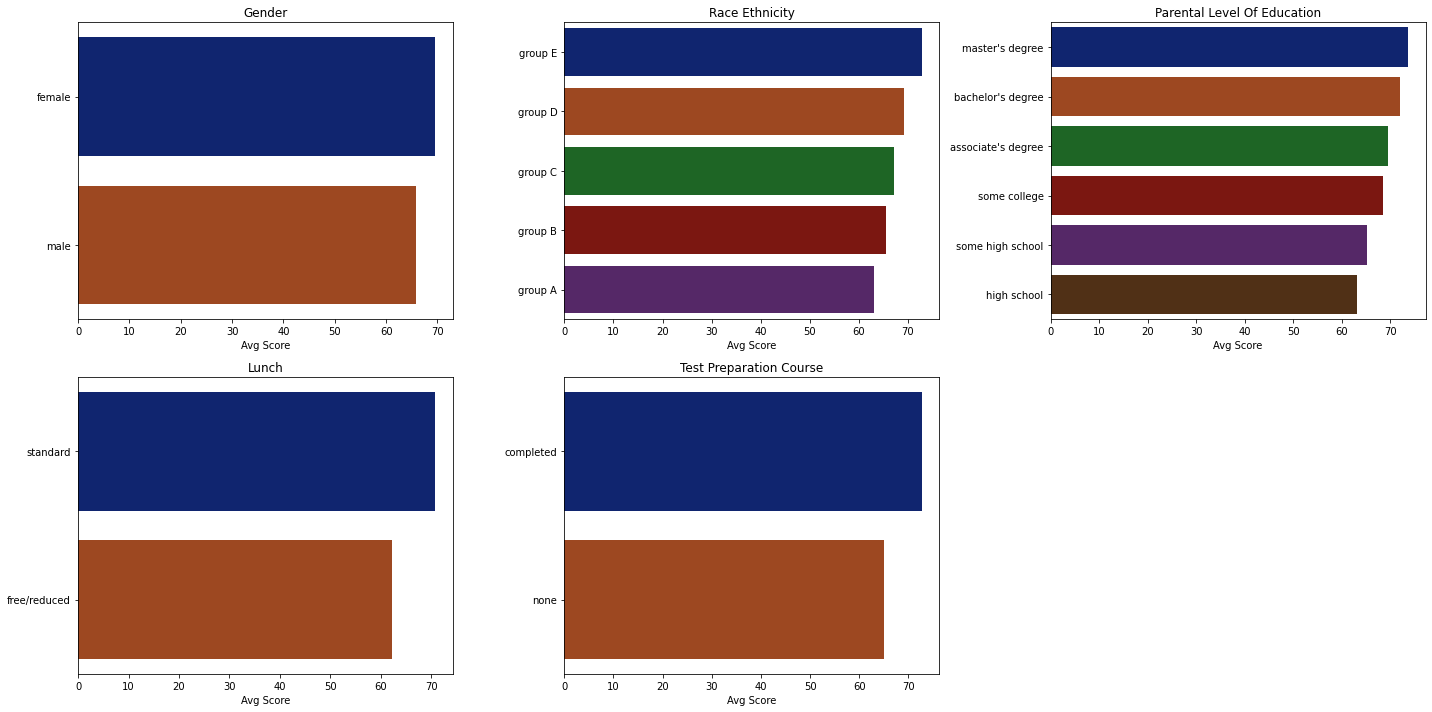

In [14]:
# output a horizontal bar plot for each feature w.r.t. the target
target = "avg_score"
i = 1
plt.figure(figsize=(20, 10))
for col in df.drop(target, axis=1).columns:
  plt.subplot(2, 3, i)
  df_temp = (df
             .groupby(col)
             [target]
             .mean()
             .to_frame()
             .sort_values(target, ascending=False)
             .reset_index()       
  )
  sns.barplot(
      x=target, 
      y=col, 
      data=df_temp, 
      palette="dark"
  )
  plt.xlabel(target.title().replace("_", " "))
  plt.ylabel(None)
  plt.title(col.title().replace("_", " "))
  i += 1

plt.tight_layout();

**`EDA takeaways`**

*   There are no missing values.
*   There are no duplicate records.
*   On average, females have higher average test scores than males.
*   On average, students belonging to race ethnicity group E have the highest average test scores.
*   On average, students whose parents have master's degrees, have the highest average test scores.
*   On average, students that are on a standard lunch plan have higher average test scores than those on a free/reducted lunch plan.
*   On average, students who completed the test preparation course have higher average test scores than those who didn't complete the course.